
### Titanic Plotting
- Load data generated previously from 'titanic_filtered.csv'
- plot histogram of ages of people
- plot no of people in each pclass on bar chart


- plot a horizontal bar-chart depicting the ratio of males to females
- plot a bar-chart depicting the ratio of male-survived, female-survived, male-dead, female-dead. 
- plot a stacked bar chart of number of male-survived,dead and female-survived, dead.
- plot stacked bar of survived with different pclass in same bar.


- plot box plot of ages of survived vs not-survived
- plot scatter plot of ages vs survived.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
titanic = pd.read_csv('titanic_filtered.csv')

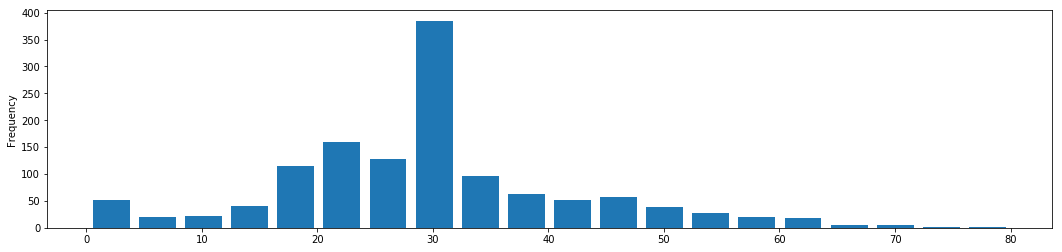

In [3]:
titanic.age.plot(kind = 'hist', figsize=(18,4),rwidth = 0.8, bins = 20)

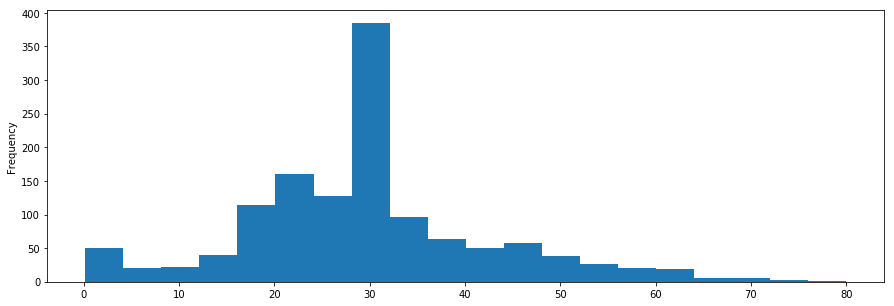

In [4]:
# plot histogram of ages of people
titanic.age.plot(kind = 'hist', figsize=(15,5), bins = 20)

3    709
1    321
2    277
Name: pclass, dtype: int64


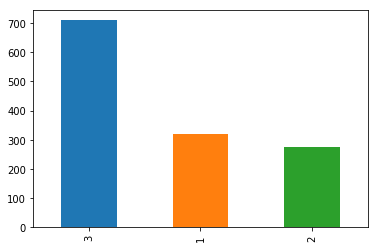

pclass
1    321
2    277
3    709
dtype: int64


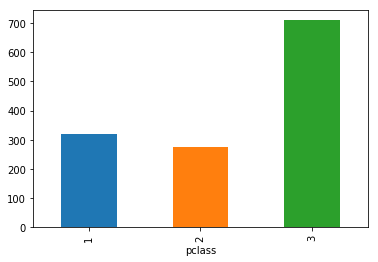

In [5]:
# plot no of people in each pclass on bar chart

print(titanic.pclass.value_counts())
titanic.pclass.value_counts().plot(kind = 'bar')
plt.show()
print(titanic.groupby('pclass').size())
titanic.groupby('pclass').size().plot(kind = 'bar')
plt.show()


male      843
female    464
Name: gender, dtype: int64


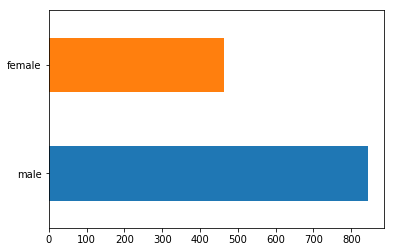

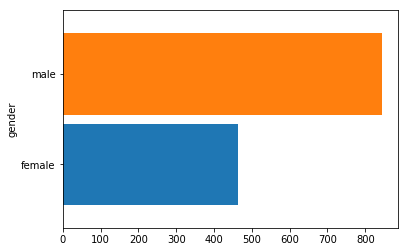

In [6]:
# plot a bar-chart depicting the ratio of males to females
print(titanic.gender.value_counts())
titanic.gender.value_counts().plot(kind='barh')
plt.show()
titanic.groupby('gender').size().plot(kind = 'barh', width = 0.9)
plt.show()

gender  survived
female  0           127
        1           337
male    0           682
        1           161
dtype: int64


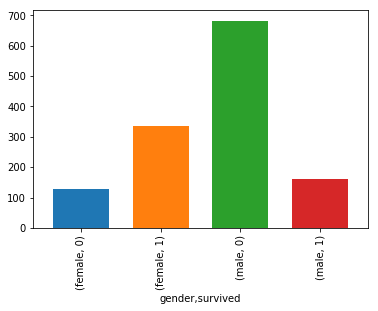

In [7]:
# plot a bar-chart depicting the ratio of male-survived, female-survived, male-dead, female-dead.
gender_survived = titanic.groupby(['gender','survived'])
print(gender_survived.size())
gender_survived.size().plot(kind = 'bar', width = 0.7)
plt.show()

gender  survived
female  0           127
        1           337
male    0           682
        1           161
dtype: int64


survived    0    1
gender            
female    127  337
male      682  161


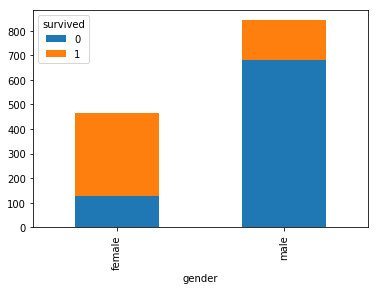

In [19]:
# plot a stacked bar chart of number of male-survived,dead and female-survived, dead.
gender_survived = titanic.groupby(['gender','survived'])
print(gender_survived.size())
print()
plot_data = gender_survived.size().unstack()
print()
print(plot_data)
plot_data.plot(kind = 'bar', stacked = True)
plt.show()

survived  pclass
0         1         123
          2         158
          3         528
1         1         198
          2         119
          3         181
dtype: int64
pclass      1    2    3
survived               
0         123  158  528
1         198  119  181


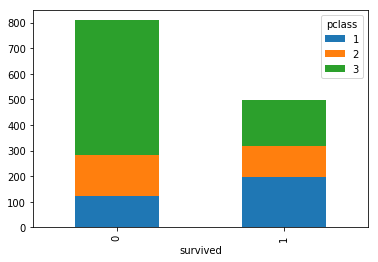

survived    0    1
pclass            
1         123  198
2         158  119
3         528  181


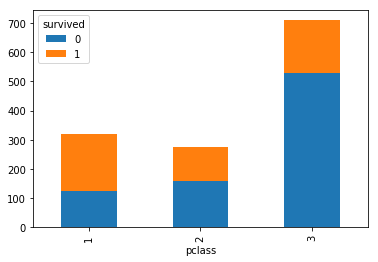

In [32]:
# plot stacked bar of survived with different pclass in same bar
survived_groups = titanic.groupby(['survived','pclass'])
print(survived_groups.size())
print(survived_groups.size().unstack())
survived_groups.size().unstack().plot(kind = 'bar', stacked=True)
plt.show()
print(survived_groups.size().unstack(level = 0))
survived_groups.size().unstack(level = 0).plot(kind='bar', stacked = True)
plt.show()

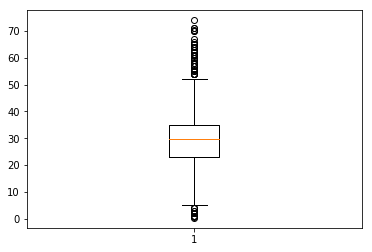

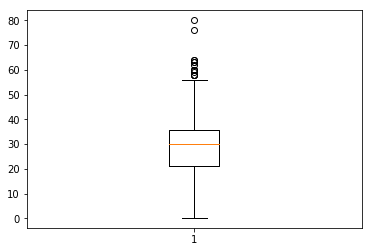

In [44]:
survived = titanic.groupby('survived')
survived_age = survived.get_group(0).age
non_survived_age = survived.get_group(1).age

plt.boxplot(survived_age)
plt.show()
plt.boxplot(non_survived_age)
plt.show()

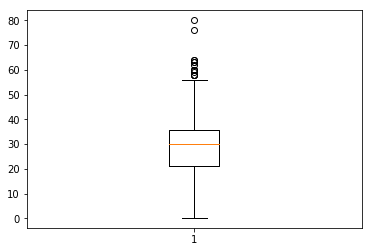

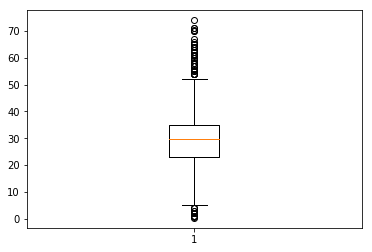

In [41]:
# plot box plot of ages of survived vs not-survived
survived_age = titanic[titanic['survived'] == 1]['age']
non_survived_age = titanic[titanic['survived'] == 0]['age']

plt.boxplot(survived_age)
plt.show()
plt.boxplot(non_survived_age)
plt.show()

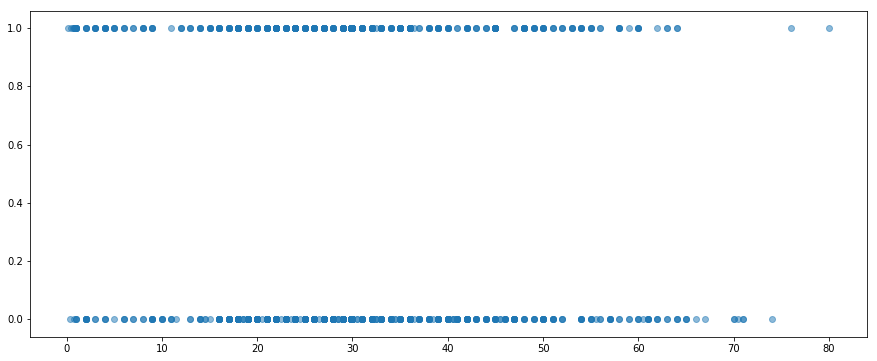

In [48]:
# plot scatter plot of ages vs survived.
plt.figure(figsize=(15,6))
plt.scatter(titanic.age, titanic.survived, alpha = 0.5)
plt.show()